https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
- -> the original data set 링크 저장 txt파일로 저장

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
input_data = pd.read_csv('diabetes.tab.txt', sep='\t', header=[0])

In [2]:
# 데이터 가져오기

#print(input_data.mean())
# input_data_std = input_data_std(0)*2

# pirnt(input_data_std)
# upper_input_data = input_data.mean() + input_data_std(0)*2
# lower_input_data = input_data.mean() - input_data_std(0)*2

# print(upper_input_data)
# print(lower_input_data)

In [3]:
input_data
# y= regression  y가 target

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# data를 train과 test로 6:4비율로 나누기 => 7:3 이런식으로 데이터를 나누어서 훈련시키며 하이퍼파라미터들을 변경
diabetes_data = input_data.drop(['Y'], axis=1)
# print(diabetes_data)
diabetes_target = input_data['Y']
# print(diabetes_target)
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)

model_diabetes = LinearRegression().fit(X_train, y_train)


(265, 10)
(177, 10)


In [5]:
model_diabetes.coef_

array([-2.77777354e-01, -2.22938335e+01,  5.97603867e+00,  1.22947519e+00,
       -9.78055090e-01,  5.65954153e-01,  2.95889731e-02,  3.69575583e+00,
        7.41001783e+01,  1.66688319e-01])

In [6]:
diabetes_data.columns
# BMI가 1 증가할 때 마다 5.60296209e+00 

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

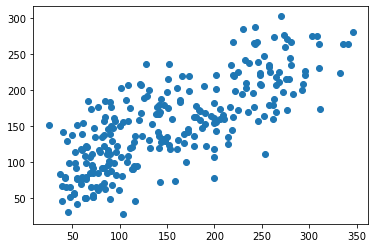

explained_variance_score: 0.5791055671515954
mean_squared_errors:2681.1968137895237
r2_score:0.5791055671515954


In [7]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
predictions = model_diabetes.predict(X_train)

plt.scatter(y_train, predictions)
plt.show()

print('explained_variance_score: {}'.format(explained_variance_score(y_train, predictions)))
print('mean_squared_errors:{}'.format(mean_squared_error(y_train, predictions)))
print('r2_score:{}'.format(r2_score(y_train, predictions)))